Table 'mushroom_secondary_data.csv from: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset  (12/07/2023) \
Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q. \
Observations: 61.069

Columns:
0. class: edible=e and poisonous=p 
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w


problems:
- cap-surface: 23% missing values
- gill-attachment: 16% missing values
- gill-spacing: 41% missing values
- stem-root: 84% missing values
- stem-surface: 62% missing values
- veil-type: 94% miss - There are a lot of missing, but it explains the target variableing values
- veil-color: 87% missing values
- ring-type: 4% missing values
- spore-print-color: 89% missing values
- duplicated values: 146

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras import models
from keras import layers

In [2]:
df = pd.read_csv('mushroom_secondary_data.csv', sep = ";")
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

# Remove duplicates
df = df[~df.duplicated()]

display(df)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,5.44,c,i,y,f,NaN,c,n,5.94,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
1,p,6.60,s,NaN,y,t,d,NaN,o,5.13,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,u
2,p,2.96,b,NaN,n,f,a,NaN,n,9.50,...,NaN,NaN,n,NaN,w,f,f,k,g,a
3,e,6.57,f,s,n,f,s,c,w,4.87,...,b,i,w,NaN,NaN,f,f,NaN,g,u
4,p,7.22,f,t,y,f,x,c,y,5.98,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,e,2.12,x,NaN,b,f,NaN,d,u,5.41,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
61065,e,47.61,o,y,y,f,p,NaN,y,8.16,...,NaN,k,n,NaN,NaN,f,f,NaN,d,u
61066,e,11.97,x,h,n,t,p,NaN,y,8.77,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
61067,p,12.65,x,NaN,n,f,p,NaN,w,11.32,...,c,NaN,n,NaN,NaN,f,f,p,d,u


In [3]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

## Verify Missing

In [4]:
# Verify missing values
def verify_missing(df):
    df_missing = pd.DataFrame(df.isna().sum())
    df_missing.columns = ['quantity']
    df_missing['percent'] = (df_missing.quantity / len(df)) * 100
    return df_missing
    
df_missing = verify_missing(df.copy())
df_missing

,quantity,percent
class,0,0.000000
cap-diameter,0,0.000000
cap-shape,0,0.000000
cap-surface,14120,23.176797
cap-color,0,0.000000
does-bruise-or-bleed,0,0.000000
gill-attachment,9855,16.176157
gill-spacing,25062,41.137173
gill-color,0,0.000000
stem-height,0,0.000000


## Verify duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
df[df.duplicated()]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season


In [7]:
# Remove duplicates
df = df[~df.duplicated()]

## Verify data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color            74

In [9]:
# Define type as category
var_category = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed'
               , 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface'
               , 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type'
               , 'spore-print-color', 'habitat', 'season']

for col in var_category:
    df[col] = df[col].astype('category')

In [10]:
# Make data frame with basic imformation about the columns
def make_column_table(df):
    df_columns_names = pd.DataFrame(df.columns, columns = ['name'])
    df_columns_names['description'] = df_columns_names['name']
    df_columns_names['type'] = df.dtypes.values
    return df_columns_names

df_columns_names = make_column_table(df)
df_columns_names

,name,description,type
0,class,class,category
1,cap-diameter,cap-diameter,float64
2,cap-shape,cap-shape,category
3,cap-surface,cap-surface,category
4,cap-color,cap-color,category
5,does-bruise-or-bleed,does-bruise-or-bleed,category
6,gill-attachment,gill-attachment,category
7,gill-spacing,gill-spacing,category
8,gill-color,gill-color,category
9,stem-height,stem-height,float64


## Describe

In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,60923,2,p,33742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-diameter,60923.0,NaN,NaN,NaN,6.741957,5.268435,0.38,3.49,5.88,8.55,62.34
cap-shape,60923,7,x,26932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,46803,11,t,8184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,60923,12,n,24205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
does-bruise-or-bleed,60923,2,f,50333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,51068,7,a,12697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,35861,3,c,24682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,60923,12,w,18492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stem-height,60923.0,NaN,NaN,NaN,6.597202,3.358757,0.0,4.65,5.96,7.75,33.92


## Data Analysis

In [12]:
def bar_graph_categoric_var(df_variable, title, rotation = 0, max_category = 50, alphabetic_order = False):
    plt.rcParams.update(plt.rcParamsDefault)
    color = 'cornflowerblue'
    contorno = None
    if alphabetic_order == True:
        df_bar_graph = pd.DataFrame(df_variable.value_counts()).sort_index().head(max_category)
    else:
        df_bar_graph = pd.DataFrame(df_variable.value_counts()).head(max_category)
    ax = df_bar_graph.plot(kind = 'bar', width = 0.5, rot = rotation
                          , align = 'center', color = color, edgecolor = contorno)
    ax.get_legend().remove()
    total = 0
    for bars in ax.patches:
        total += bars.get_height()
       
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/total:.1%}'
                    , (x + width/2, y + 2 + height)
                    , ha = 'center')
        plt.title(title, fontsize = 10)

### Target variable

,class,%
class,,
p,33742,0.553847
e,27181,0.446153


<Figure size 600x300 with 0 Axes>

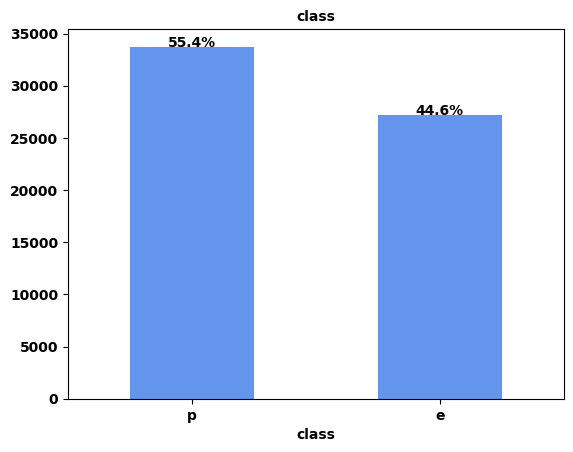

In [13]:
# Proporção da target
variable = 'class'
title = 'class'
value_counts = pd.DataFrame(df[variable].value_counts(dropna = False))
value_counts.columns = [variable]
value_counts['%'] = value_counts[variable] / sum(value_counts[variable])
display(value_counts)
plt.figure(figsize = (6,3))
df_variable = df[variable]
bar_graph_categoric_var(df_variable, title, rotation = 0, max_category = 15)
plt.show()
plt.close()

### Continuous variables

In [14]:
def bar_graf(x_limits, top_size_y, df_variable, title, bins = 10):
    plt.rcParams.update(plt.rcParamsDefault)
    color = 'cornflowerblue'
    contorno = None
   
    ax = df_variable.hist(density = False
            , weights = np.ones(len(df_variable)) / len(df_variable)
            , histtype = 'bar', bins = bins, align = 'mid'
            , orientation = 'vertical'
            , color = color, edgecolor = contorno)
   
    plt.grid(False)
    plt.title(title, fontsize = 10)
    plt.xlim(x_limits)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylim(top = top_size_y)
    return

def box_plot_graph(df, variable, title, y_lim):
    plt.rcParams.update(plt.rcParamsDefault)
   
    bg_color = "white"
    contorno = 'black'
    color = 'black'
    sns.set_style("darkgrid", {'axes.facecolor': bg_color
                              , 'axes.edgecolor': contorno})
    meanpointprops = dict(color = color, linewidth = 1.5)
   
    ax = sns.boxplot(y = variable, data = df
                    , showmeans = True, meanline = True, meanprops = meanpointprops)
    ax.set_title(title, fontsize = 10)
    ax.set(ylim = y_lim)

def box_plot_graph_hue(df, variable, title, y_lim, hue_var = 'target', hue_order = ['e', 'p']):
    plt.rcParams.update(plt.rcParamsDefault)
   
    bg_color = "white"
    contorno = 'black'
    color = 'black'
    sns.set_style("darkgrid", {'axes.facecolor': bg_color
                              , 'axes.edgecolor': contorno})
    meanpointprops = dict(color = color, linewidth = 1.5)
   
    ax = sns.boxplot(y = variable, data = df, x = hue_var, order = hue_order
                    , showmeans = True, meanline = True, meanprops = meanpointprops)
    ax.set_title(title, fontsize = 10)
    ax.set(ylim = y_lim)
    
def plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y):
    plt.figure(figsize = (6,3))

    x_limits = [-1, x_max]
    df_variable = df[variable]

    bar_graf(x_limits, top_size_y, df_variable, title, bins)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    plt.close()

    # Boxplot
    plt.figure(figsize = (2,3))
    title = title
    y_lim = (-1, x_max)
    box_plot_graph(df, variable, title, y_lim)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    plt.close()

    media = df[variable].mean()
    mediana = df[variable].median()
    print(variable, 'mean:', media)
    print(variable, 'median:', mediana)


    # Verifica relação com a target
    plt.figure(figsize = (5,3))
    title = 'Boxplot: ' + title
    y_lim = (0, x_max)
    box_plot_graph_hue(df, variable, title, y_lim, hue_var = target_variable)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    plt.close()

    mean_e = df[np.in1d(df[target_variable], 'e')][variable].mean()
    median_e = df[np.in1d(df[target_variable], 'e')][variable].median()
    mean_p = df[np.in1d(df[target_variable], 'p')][variable].mean()
    median_p = df[np.in1d(df[target_variable], 'p')][variable].median()
    zeros_or_negatives = len(df[df[variable] <= 0])
    print(variable, 'Mean for type white:', mean_e)
    print(variable, 'Median for type white:', median_e)
    print(variable, 'Mean for type red:', mean_p)
    print(variable, 'Median for type red:', median_p)
    print(variable, 'Quantity of 0 or negatves:', zeros_or_negatives, 'percent:', f'{zeros_or_negatives/len(df):.1%}')

## Continuous variables

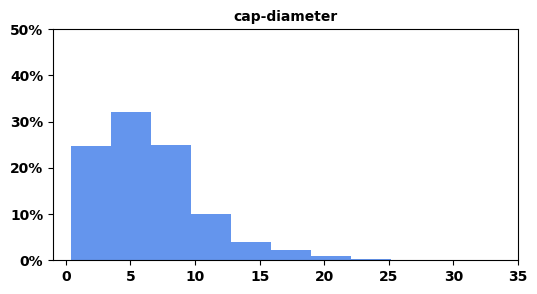

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


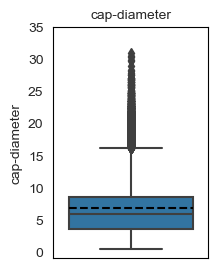

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


cap-diameter mean: 6.741957224693466
cap-diameter median: 5.88


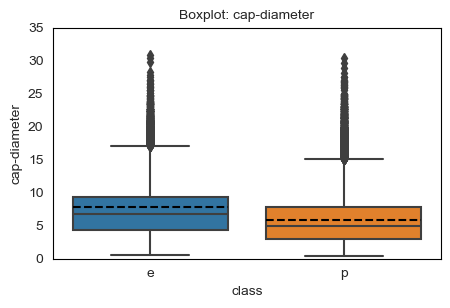

cap-diameter Mean for type white: 7.798695780140539
cap-diameter Median for type white: 6.71
cap-diameter Mean for type red: 5.8906973504830775
cap-diameter Median for type red: 5.0
cap-diameter Quantity of 0 or negatves: 0 percent: 0.0%


In [15]:
# Variável: cap-diameter
variable = df_columns_names['name'][1]
title = variable
target_variable = 'class'
x_max = 35
top_size_y = 0.5
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

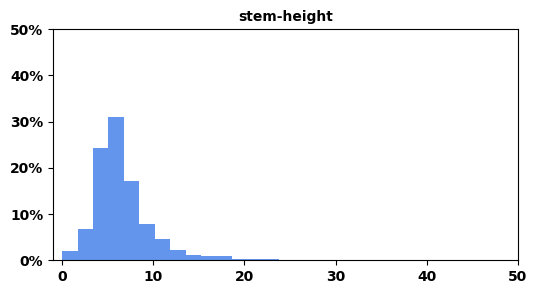

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


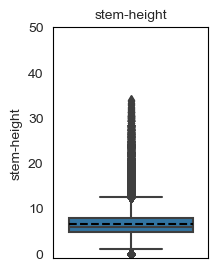

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


stem-height mean: 6.597201713638527
stem-height median: 5.96


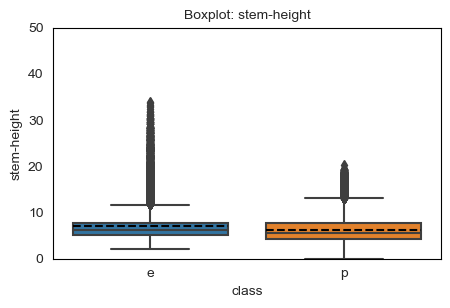

stem-height Mean for type white: 7.039076560832935
stem-height Median for type white: 6.24
stem-height Mean for type red: 6.241247703159267
stem-height Median for type red: 5.64
stem-height Quantity of 0 or negatves: 915 percent: 1.5%


In [16]:
# Variável: stem-height
variable = df_columns_names['name'][9]
title = variable
target_variable = 'class'
x_max = 50
top_size_y = 0.5
bins = 20

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

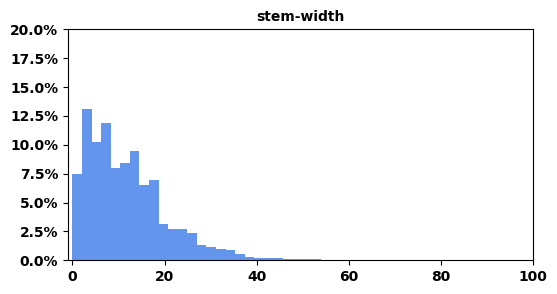

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


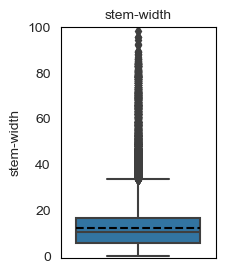

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


stem-width mean: 12.178483823843214
stem-width median: 10.22


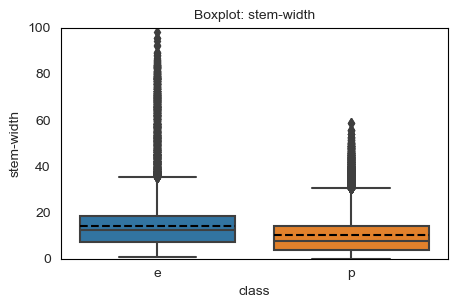

stem-width Mean for type white: 14.361083845333138
stem-width Median for type white: 12.59
stem-width Mean for type red: 10.420281844585384
stem-width Median for type red: 7.7
stem-width Quantity of 0 or negatves: 915 percent: 1.5%


In [17]:
# Variável: stem-width
variable = df_columns_names['name'][10]
title = variable
target_variable = 'class'
x_max = 100
top_size_y = 0.2
bins = 50

plots_continuous_variables(df, variable, target_variable, bins, title, x_max, top_size_y)

## Categorical variables

In [18]:
def bar_graph_stacked_categoric_var(df_variable, variable, target_variable, title, rotation = 90, max_category = 500):
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rc('xtick', labelsize = 8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize = 8)    # fontsize of the tick labels
    color_1 = 'cornflowerblue'
    color_2 = 'lightblue'
    contorno = None
    
    total = df_variable.groupby(variable).count().reset_index()
    total = total.sort_values(target_variable, ascending = False).head(max_category)
    target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
    
    # limit the plot when there are too many categories
    target_index = []
    for i in range(0, len(target)):
        if i in total.index:
            target_index.append(True)
        else:
            target_index.append(False)
    target = target[target_index]
    
    target[target_variable] = target[target_variable] / total[target_variable]
    target.sort_values(target_variable, ascending = False, inplace = True)
    total[target_variable] = 1  
    
    # bar chart 1, top bars 
    bar1 = sns.barplot(x = variable,  y = target_variable, data = total, color = color_1)
    
    # bar chart 2, bottom bars
    bar2 = sns.barplot(x = variable,  y = target_variable, data = target, color = color_2)
    
    # add legend
    top_bar = mpatches.Patch(color = color_1, label = 'Poisonous ')
    bottom_bar = mpatches.Patch(color = color_2, label = 'Edible')
    
    bar2.set_xticklabels(bar2.get_xticklabels(), rotation = rotation)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(handles=[top_bar, bottom_bar], loc = 'lower left', fontsize = 8)
    
    plt.title(title, fontsize = 10)
    plt.show()
    plt.close()
    target.columns = [[variable, '% edibles']]
    display(target)

    return


def categorical_analysis_plots(df, variable, title,  target_variable = 'class'):
    value_counts = pd.DataFrame(df[variable].value_counts(dropna = False))
    value_counts.columns = [variable]
    value_counts['%'] = value_counts[variable] / sum(value_counts[variable])
    display(value_counts)
    plt.figure(figsize = (6,3))
    df_variable = df[variable]
    bar_graph_categoric_var(df_variable, title, rotation = 90)
    
    plt.show()
    plt.close()
    
    # Analysis with target
    df_variable = df[[variable, target_variable]]
    bar_graph_stacked_categoric_var(df_variable, variable, target_variable, title, rotation = 90)
    
    plt.show()
    plt.close()
    return

,cap-shape,%
cap-shape,,
x,26932,0.442066
f,13404,0.220015
s,7164,0.117591
b,5694,0.093462
o,3316,0.054429
p,2598,0.042644
c,1815,0.029792


<Figure size 600x300 with 0 Axes>

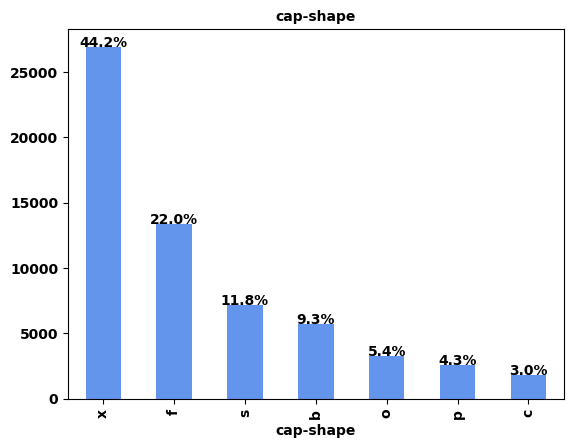

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

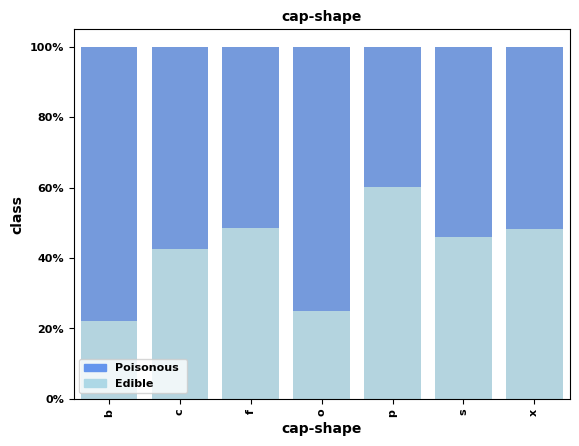

,cap-shape,% edibles
4,p,0.603156
2,f,0.485079
6,x,0.481212
5,s,0.459939
1,c,0.426446
3,o,0.248794
0,b,0.220934


In [19]:
# cap-shape
variable = 'cap-shape'
title = variable
categorical_analysis_plots(df, variable, title)

,cap-surface,%
cap-surface,,
NaN,14120,0.231768
t,8184,0.134334
s,7580,0.124419
y,6341,0.104082
h,4974,0.081644
g,4722,0.077508
d,4432,0.072748
e,2584,0.042414
k,2303,0.037802


<Figure size 600x300 with 0 Axes>

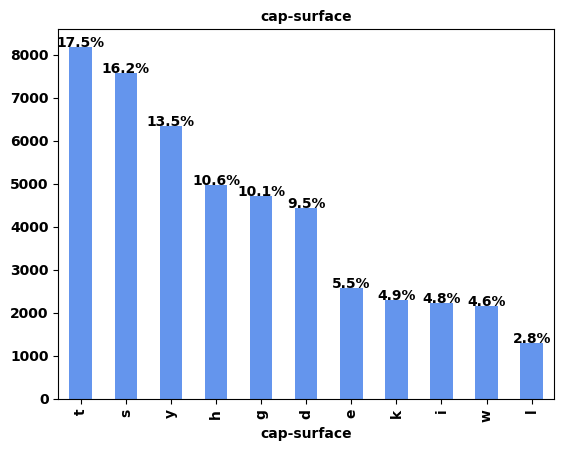

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

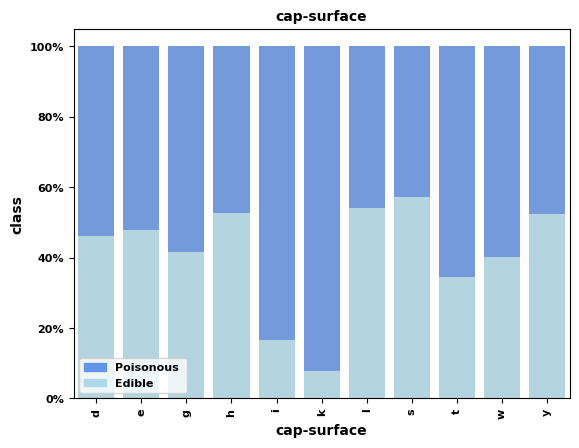

,cap-surface,% edibles
7,s,0.572296
6,l,0.539755
3,h,0.526136
10,y,0.524996
1,e,0.478328
0,d,0.462319
2,g,0.415925
9,w,0.400930
8,t,0.344941
4,i,0.165843


In [20]:
# cap-surface
variable = 'cap-surface'
title = variable
categorical_analysis_plots(df, variable, title)

,cap-color,%
cap-color,,
n,24205,0.397305
y,8541,0.140193
w,7649,0.125552
g,4312,0.070778
e,4035,0.066231
o,3653,0.059961
r,1779,0.029201
u,1709,0.028052
p,1703,0.027953


<Figure size 600x300 with 0 Axes>

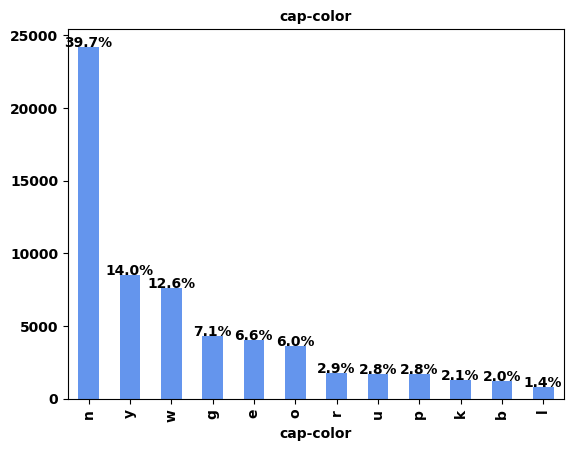

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

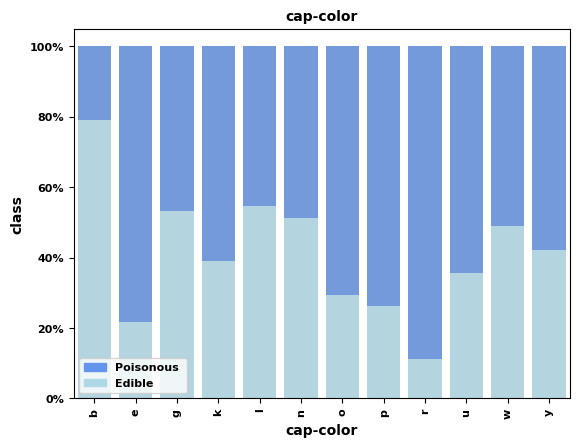

,cap-color,% edibles
0,b,0.791870
4,l,0.545894
2,g,0.532699
5,n,0.512580
10,w,0.490260
11,y,0.420443
3,k,0.391712
9,u,0.357519
6,o,0.293184
7,p,0.263652


In [21]:
# cap-color
variable = 'cap-color'
title = variable
categorical_analysis_plots(df, variable, title)

,does-bruise-or-bleed,%
does-bruise-or-bleed,,
f,50333,0.826174
t,10590,0.173826


<Figure size 600x300 with 0 Axes>

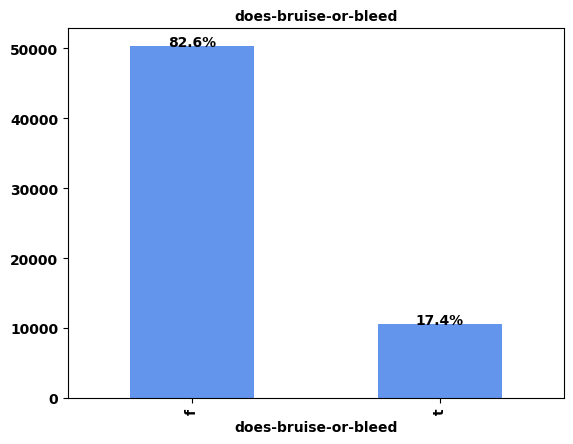

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

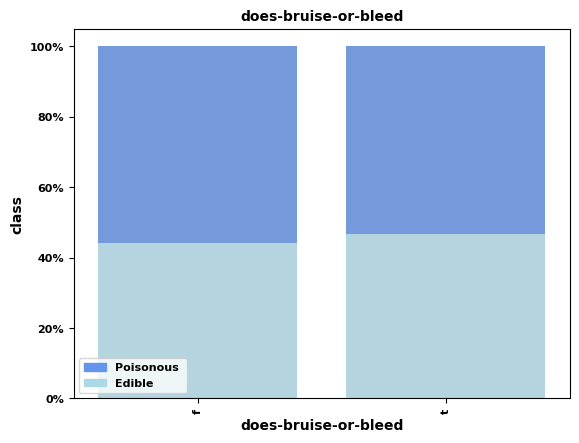

,does-bruise-or-bleed,% edibles
1,t,0.466667
0,f,0.441837


In [22]:
# does-bruise-or-bleed
variable = 'does-bruise-or-bleed'
title = variable
categorical_analysis_plots(df, variable, title)

,gill-attachment,%
gill-attachment,,
a,12697,0.208411
d,10247,0.168196
NaN,9855,0.161762
x,7413,0.121678
p,6001,0.098501
e,5648,0.092707
s,5648,0.092707
f,3414,0.056038


<Figure size 600x300 with 0 Axes>

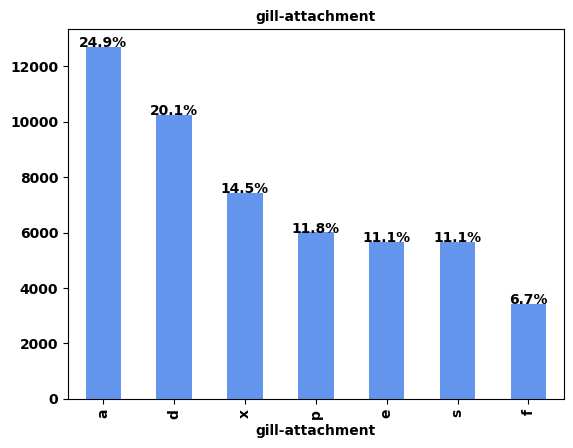

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

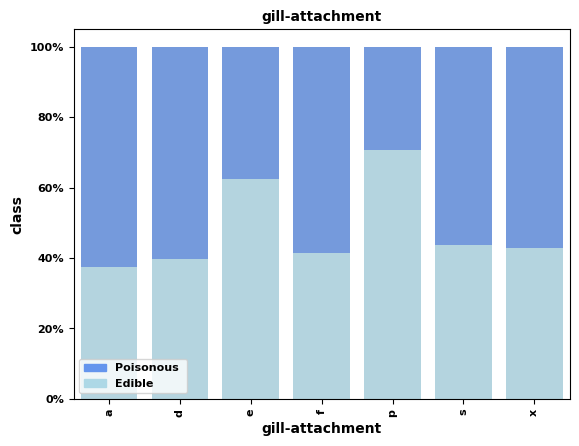

,gill-attachment,% edibles
4,p,0.705882
2,e,0.625000
5,s,0.437500
6,x,0.428571
3,f,0.413591
1,d,0.398165
0,a,0.373710


In [23]:
# gill-attachment
variable = 'gill-attachment'
title = variable
categorical_analysis_plots(df, variable, title)

,gill-spacing,%
gill-spacing,,
NaN,25062,0.411372
c,24682,0.405134
d,7765,0.127456
f,3414,0.056038


<Figure size 600x300 with 0 Axes>

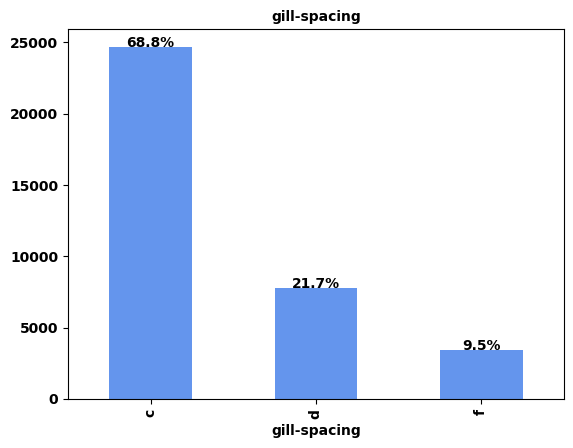

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

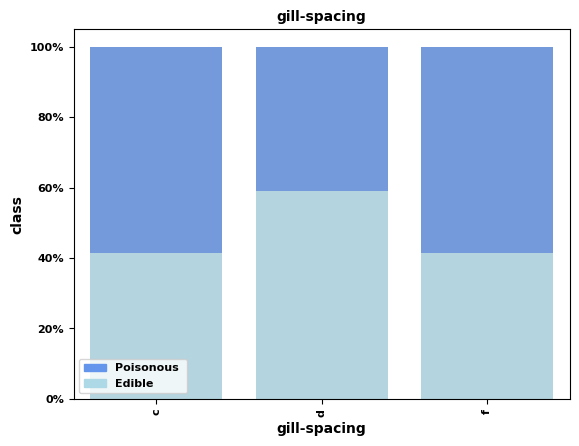

,gill-spacing,% edibles
1,d,0.590985
0,c,0.414756
2,f,0.413591


In [24]:
# gill-spacing
variable = 'gill-spacing'
title = variable
categorical_analysis_plots(df, variable, title)

,gill-color,%
gill-color,,
w,18492,0.303531
n,9645,0.158315
y,9545,0.156673
p,5983,0.098206
g,4118,0.067594
f,3414,0.056038
o,2909,0.047749
k,2375,0.038984
r,1399,0.022963


<Figure size 600x300 with 0 Axes>

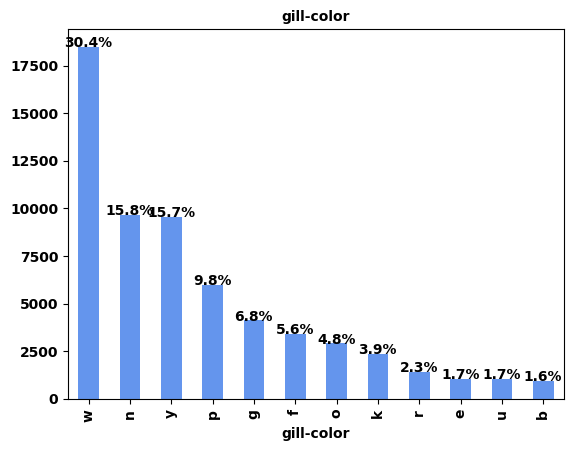

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

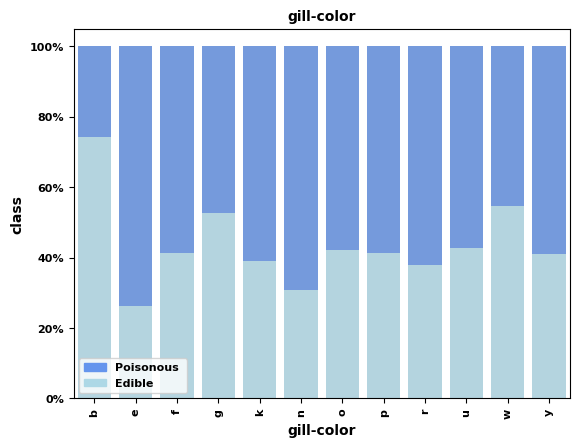

,gill-color,% edibles
0,b,0.744235
10,w,0.546561
3,g,0.528169
9,u,0.428152
6,o,0.420419
2,f,0.413591
7,p,0.412001
11,y,0.411734
4,k,0.390737
8,r,0.379557


In [25]:
# gill-color
variable = 'gill-color'
title = variable
categorical_analysis_plots(df, variable, title)

,stem-root,%
stem-root,,
NaN,51536,0.845920
b,3177,0.052148
s,3177,0.052148
r,1412,0.023177
f,915,0.015019
c,706,0.011588


<Figure size 600x300 with 0 Axes>

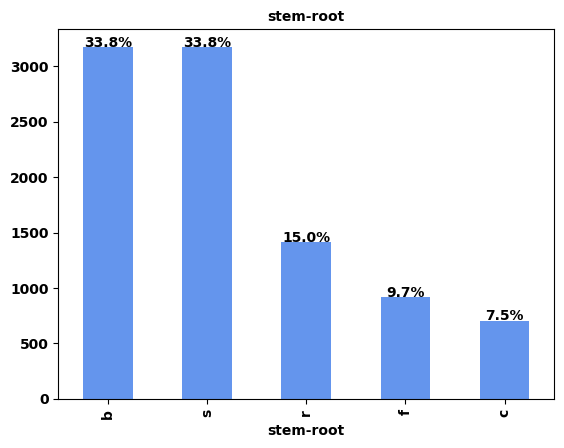

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

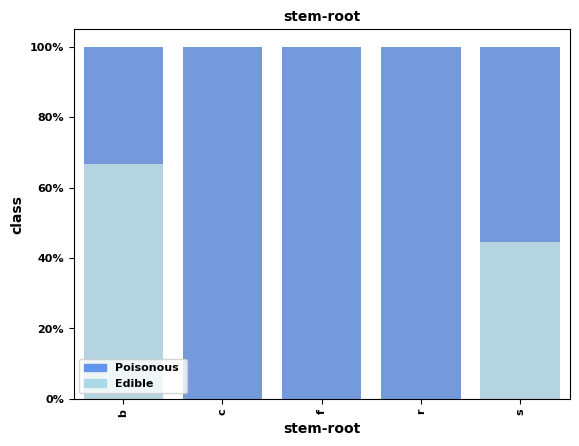

,stem-root,% edibles
0,b,0.666667
4,s,0.444444
1,c,0.000000
2,f,0.000000
3,r,0.000000


In [26]:
# stem-root
variable = 'stem-root'
title = variable
categorical_analysis_plots(df, variable, title)

,stem-surface,%
stem-surface,,
NaN,38122,0.625741
s,6025,0.098895
y,4940,0.081086
i,4396,0.072157
t,2644,0.043399
g,1765,0.028971
k,1581,0.025951
f,915,0.015019
h,535,0.008782


<Figure size 600x300 with 0 Axes>

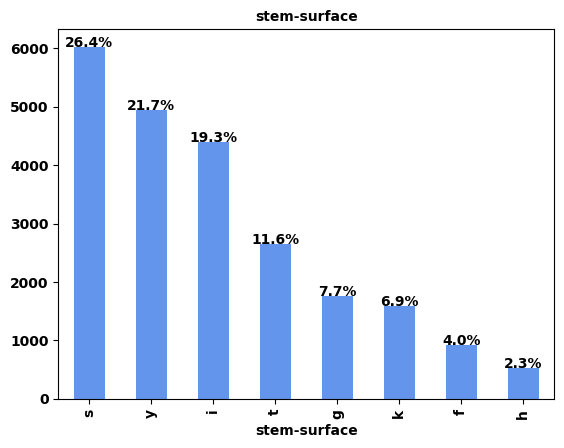

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

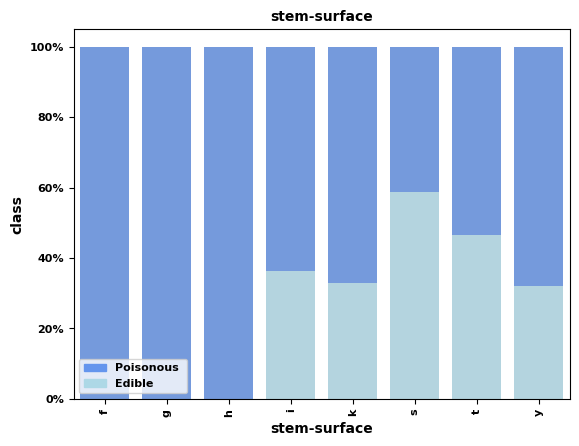

,stem-surface,% edibles
5,s,0.588714
6,t,0.465961
3,i,0.362147
4,k,0.330171
7,y,0.319636
0,f,0.000000
1,g,0.000000
2,h,0.000000


In [27]:
# stem-surface
variable = 'stem-surface'
title = variable
categorical_analysis_plots(df, variable, title)

,stem-color,%
stem-color,,
w,22926,0.376311
n,18063,0.296489
y,7864,0.129081
g,2626,0.043104
o,2187,0.035898
e,2049,0.033633
u,1490,0.024457
p,1025,0.016825
f,915,0.015019


<Figure size 600x300 with 0 Axes>

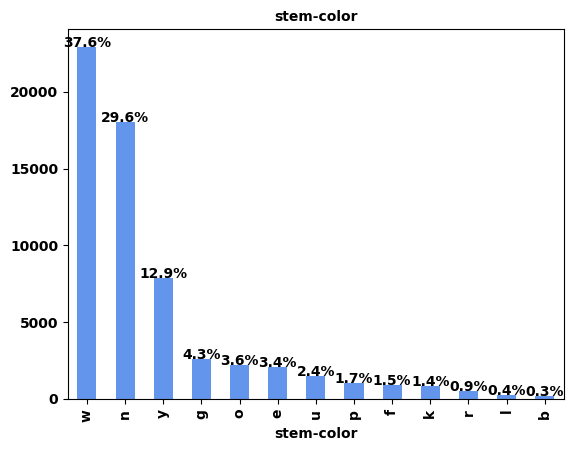

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

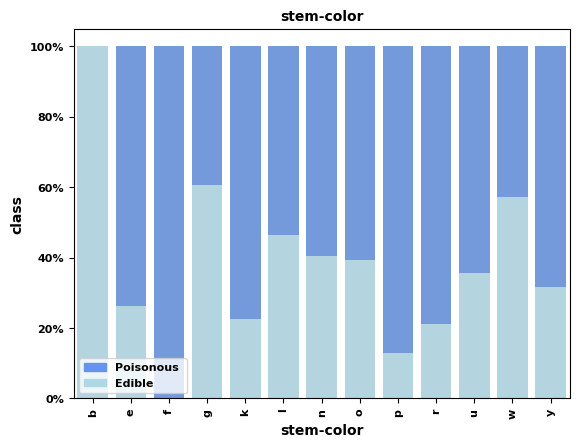

,stem-color,% edibles
0,b,1.000000
3,g,0.607007
11,w,0.573279
5,l,0.464602
6,n,0.404584
7,o,0.392318
10,u,0.357718
12,y,0.317141
1,e,0.262567
4,k,0.225806


In [28]:
# stem-color
variable = 'stem-color'
title = variable
categorical_analysis_plots(df, variable, title)

,veil-type,%
veil-type,,
NaN,57746,0.947852
u,3177,0.052148


<Figure size 600x300 with 0 Axes>

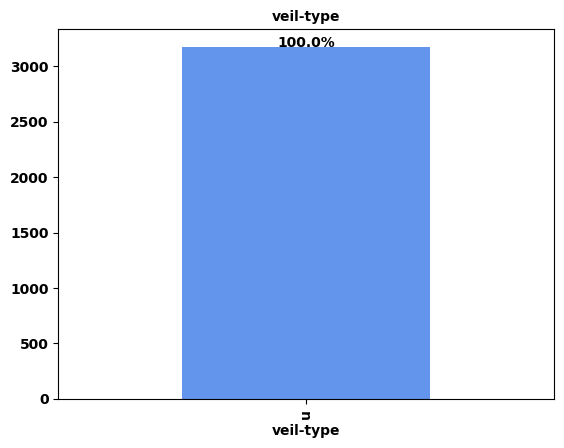

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

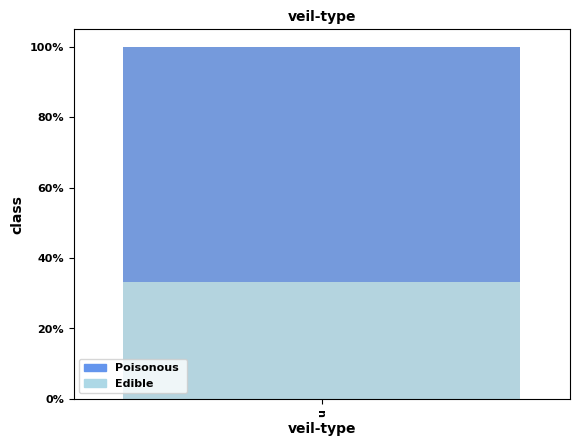

,veil-type,% edibles
0,u,0.333333


In [29]:
# veil-type	
variable = 'veil-type'
title = variable
categorical_analysis_plots(df, variable, title)

,veil-color,%
veil-color,,
NaN,53510,0.878322
w,5474,0.089851
y,527,0.008650
n,525,0.008617
k,353,0.005794
u,353,0.005794
e,181,0.002971


<Figure size 600x300 with 0 Axes>

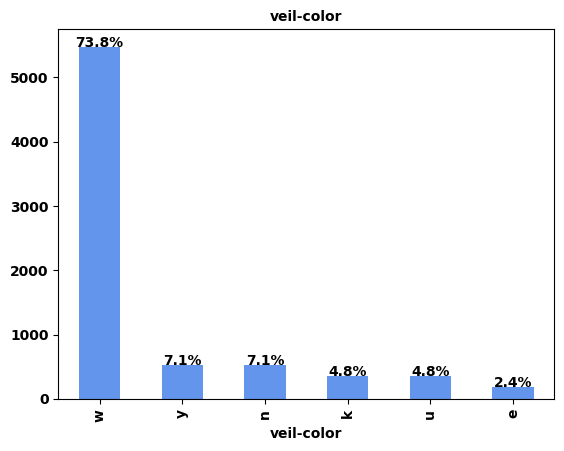

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

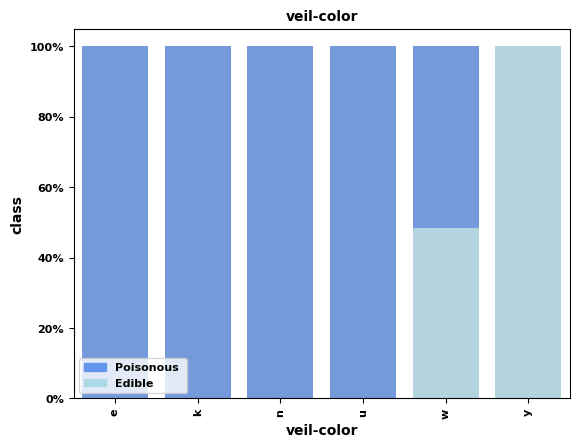

,veil-color,% edibles
5,y,1.000000
4,w,0.484107
0,e,0.000000
1,k,0.000000
2,n,0.000000
3,u,0.000000


In [30]:
# veil-color
variable = 'veil-color'
title = variable
categorical_analysis_plots(df, variable, title)

,has-ring,%
has-ring,,
f,45756,0.751046
t,15167,0.248954


<Figure size 600x300 with 0 Axes>

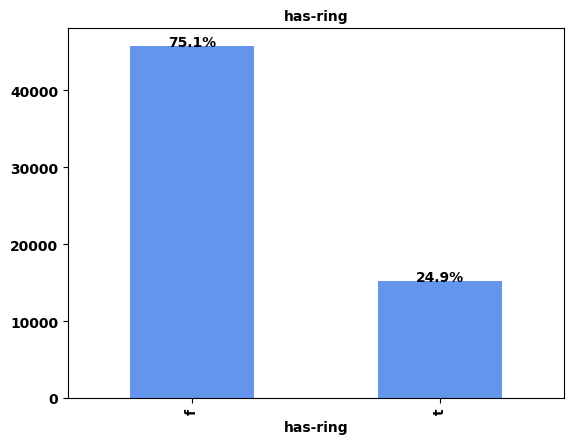

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

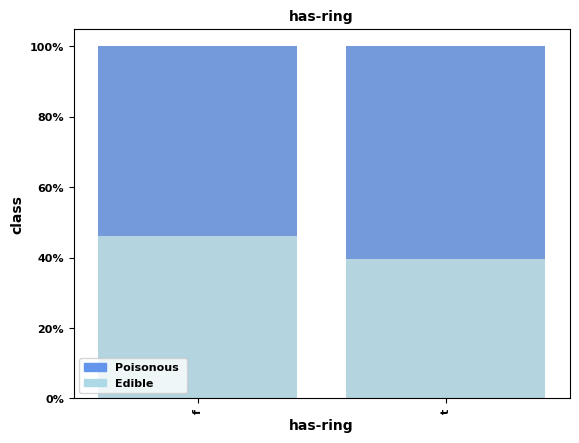

,has-ring,% edibles
0,f,0.462890
1,t,0.395662


In [31]:
# has-ring
variable = 'has-ring'
title = variable
categorical_analysis_plots(df, variable, title)

,ring-type,%
ring-type,,
f,48215,0.791409
NaN,2471,0.040559
e,2435,0.039968
z,2118,0.034765
l,1427,0.023423
r,1399,0.022963
p,1265,0.020764
g,1240,0.020354
m,353,0.005794


<Figure size 600x300 with 0 Axes>

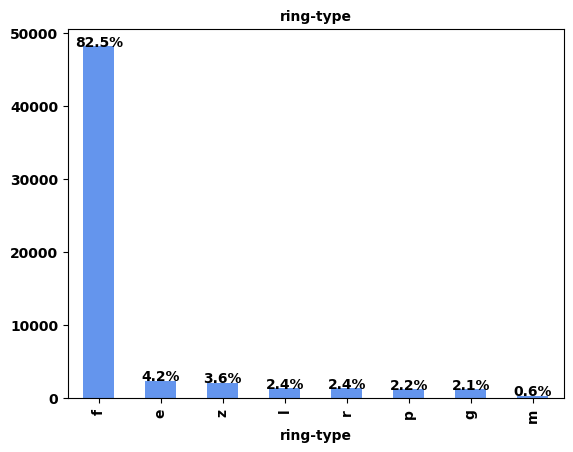

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

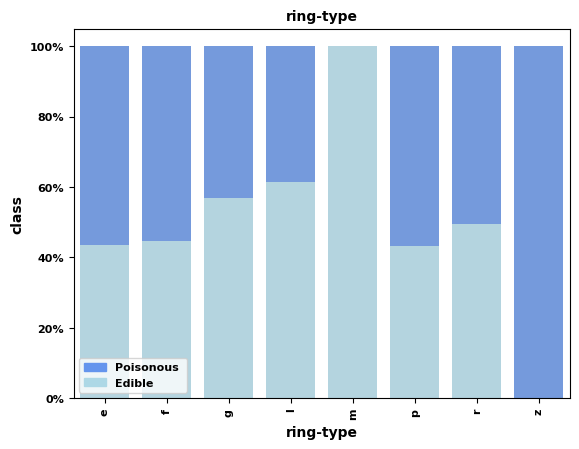

,ring-type,% edibles
4,m,1.000000
3,l,0.614576
2,g,0.569355
6,r,0.495354
1,f,0.446604
0,e,0.434908
5,p,0.433202
7,z,0.000000


In [32]:
# ring-type
variable = 'ring-type'
title = variable
categorical_analysis_plots(df, variable, title)

,spore-print-color,%
spore-print-color,,
NaN,54597,0.896164
k,2118,0.034765
p,1259,0.020665
w,1212,0.019894
n,1031,0.016923
g,353,0.005794
u,182,0.002987
r,171,0.002807


<Figure size 600x300 with 0 Axes>

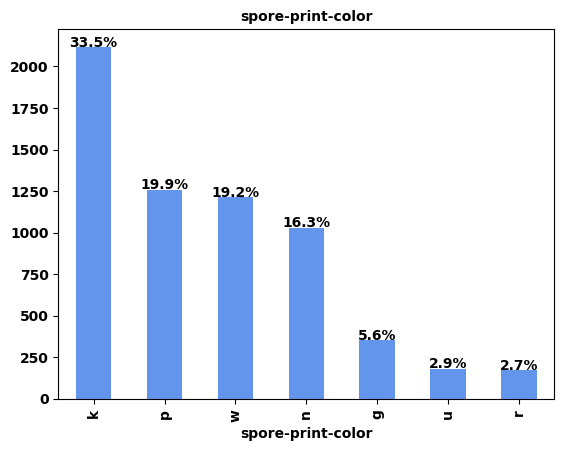

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

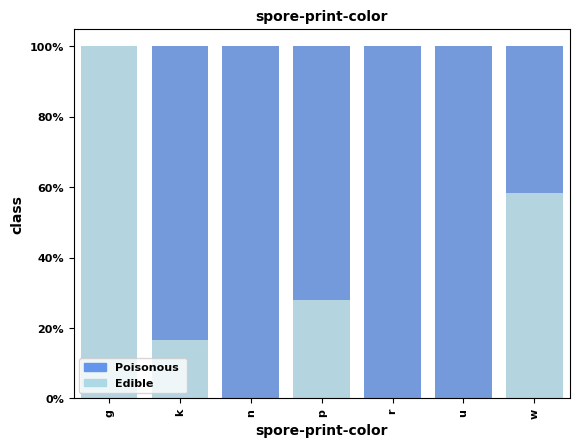

,spore-print-color,% edibles
0,g,1.000000
6,w,0.582508
3,p,0.280381
1,k,0.166667
2,n,0.000000
4,r,0.000000
5,u,0.000000


In [33]:
# spore-print-color
variable = 'spore-print-color'
title = variable
categorical_analysis_plots(df, variable, title)

,habitat,%
habitat,,
d,44063,0.723257
g,7943,0.130378
l,3168,0.052000
m,2920,0.047929
h,2001,0.032845
p,360,0.005909
w,353,0.005794
u,115,0.001888


<Figure size 600x300 with 0 Axes>

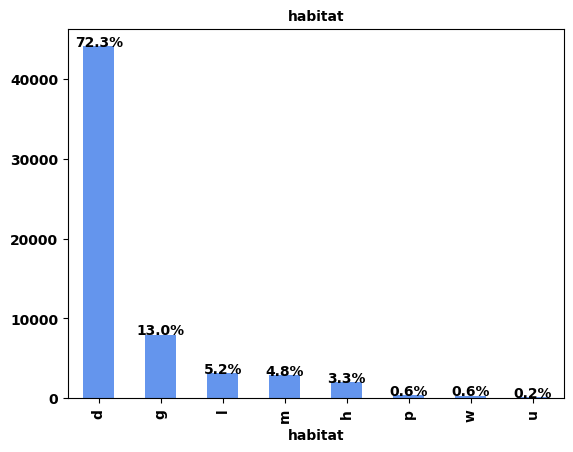

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

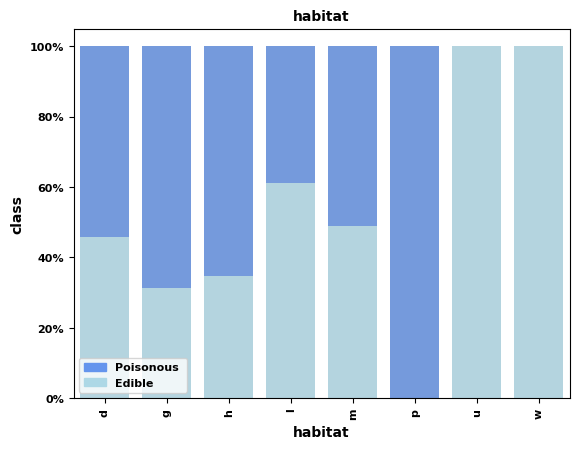

,habitat,% edibles
6,u,1.000000
7,w,1.000000
3,l,0.611742
4,m,0.488699
0,d,0.457595
2,h,0.347826
1,g,0.313358
5,p,0.000000


In [34]:
# habitat
variable = 'habitat'
title = variable
categorical_analysis_plots(df, variable, title)

,season,%
season,,
a,30141,0.494739
u,22850,0.375064
w,5233,0.085895
s,2699,0.044302


<Figure size 600x300 with 0 Axes>

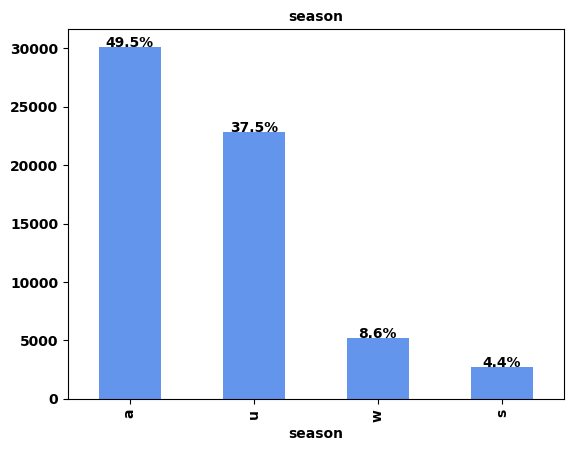

C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_variable.groupby(variable).count().reset_index()
C:\Users\maxwi\AppData\Local\Temp\ipykernel_19448\1316663584.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target = df_variable[df_variable[target_variable] == 'e'].groupby(variable).count().reset_index()
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

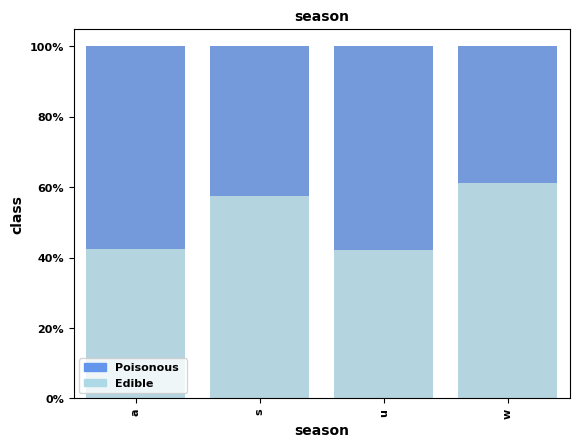

,season,% edibles
3,w,0.610740
1,s,0.575398
0,a,0.424173
2,u,0.422188


In [35]:
# season
variable = 'season'
title = variable
categorical_analysis_plots(df, variable, title)

## Correlation

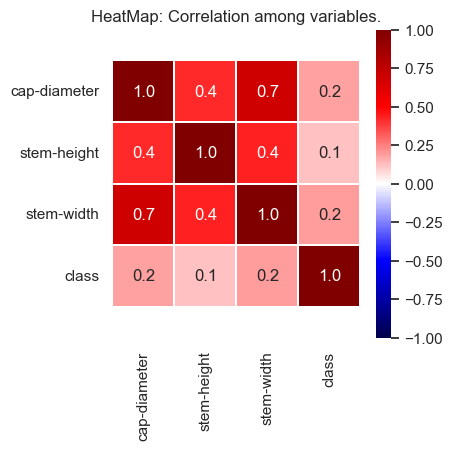

In [36]:
def correlation_heatmap(df, title):
    size_x = 4
    size_y = 4
    plt.figure(figsize = (size_x, size_y))
    sns.set(font_scale = 1)
    corr_matrix = df.corr()
    with sns.axes_style('white'):
        ax = sns.heatmap(corr_matrix
                        , linewidth = 0.2
                        , annot = True, fmt = '.1f'
                        , cmap = 'seismic'
                        , vmin = -1, vmax = 1)
    plt.title(title)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    plt.close()
    
    
# drop_variables_2 = []
# df_corr = df.drop(drop_variaveis_2, axis = 1).copy()
df_corr = df[['cap-diameter', 'stem-height', 'stem-width', 'class']].copy()
df_corr['class'] = [1 if x == 'e' else 0 for x in df_corr['class']]

title = 'HeatMap: Correlation among variables.'
correlation_heatmap(df_corr, title)

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Figure size 1000x1000 with 0 Axes>

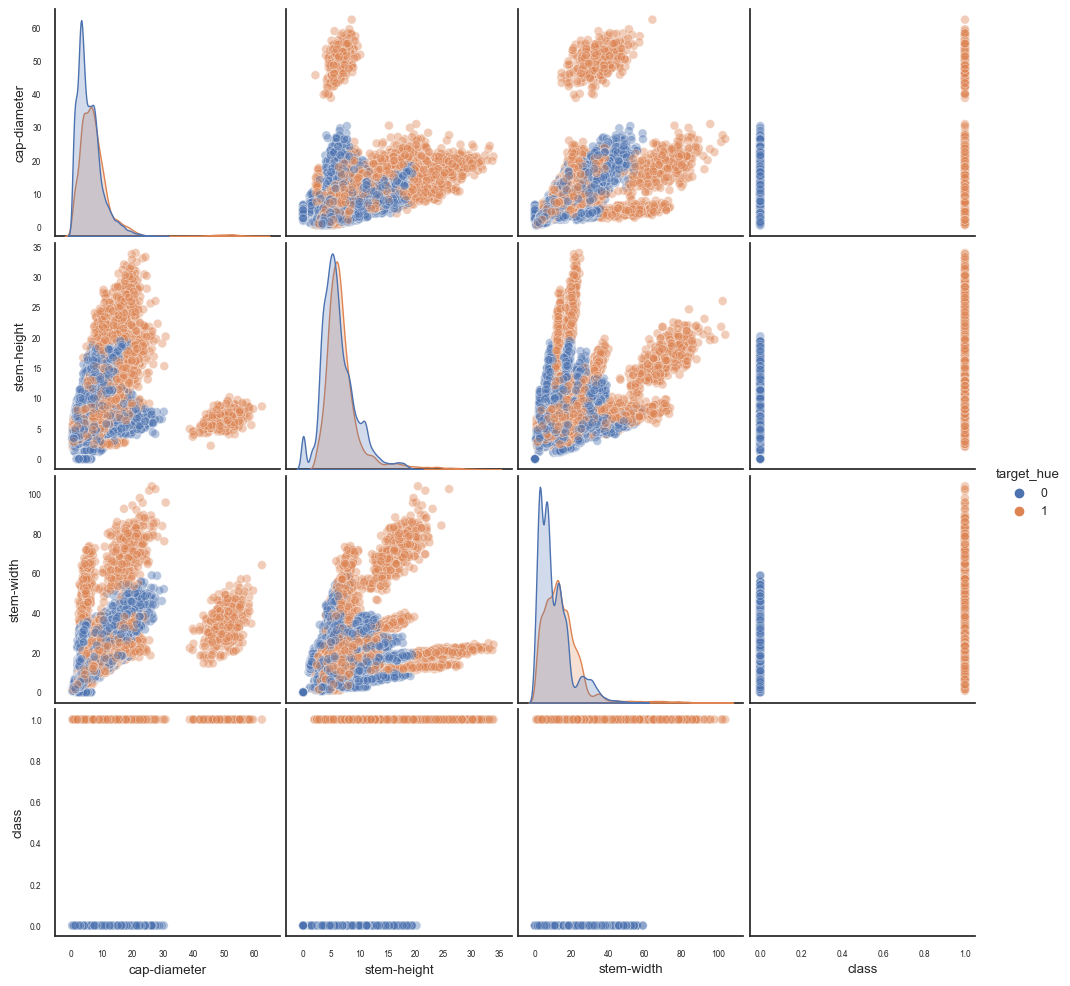

In [37]:
# Pair plot
# drop_variaveis_3 = []
# df_pairplot = df_corr.drop(drop_variaveis_3, axis = 1).copy()
df_pairplot = df_corr.copy()
df_pairplot['target_hue'] = df_pairplot['class']

# Jupyter cannot plot too many variables.
# df_pairplot_aux = df_pairplot[[, 'type', 'target_hue']]
df_pairplot_aux = df_pairplot.copy()

plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.8)
plt.rc('xtick', labelsize = 6)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 6)    # fontsize of the tick labels
with sns.axes_style('white'):
    ax = sns.pairplot(df_pairplot_aux, hue = "target_hue", hue_order = [0, 1]
                      , plot_kws = {'alpha': 0.4, 's': 40})
plt.show()
plt.close()